In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('sampleData.csv')
df.head()

,order_date,customer,productAgrupationID,productID,territory,product_cases_ordered
0,2020-01-23T00:00:00.000Z,247474,1431.0,10159,262,28.76
1,2020-01-24T00:00:00.000Z,239611,1626.0,9968,263,28.76
2,2020-01-31T00:00:00.000Z,382014,1202.0,9864,279,28.76
3,2020-01-31T00:00:00.000Z,382014,1202.0,9863,279,28.76
4,2020-01-21T00:00:00.000Z,225565,1202.0,9864,263,28.76


In [3]:
df.dtypes

order_date                object
customer                   int64
productAgrupationID      float64
productID                  int64
territory                  int64
product_cases_ordered    float64
dtype: object

In [4]:
df['customer'] = df['customer'].astype(str)
df['productAgrupationID'] = df['productAgrupationID'].astype(int).astype(str)
df['productID'] = df['productID'].astype(str)
df['territory'] = df['territory'].astype(str)
df['order_date'] = pd.to_datetime(df['order_date'])
df.sort_values(by=['order_date'], inplace=True)
df.dtypes

order_date               datetime64[ns, UTC]
customer                              object
productAgrupationID                   object
productID                             object
territory                             object
product_cases_ordered                float64
dtype: object

In [5]:
df.head()


,order_date,customer,productAgrupationID,productID,territory,product_cases_ordered
60949,2020-01-02 00:00:00+00:00,247474,1117,1265,262,32.760
60942,2020-01-02 00:00:00+00:00,239566,1121,877,268,29.760
60944,2020-01-02 00:00:00+00:00,239566,1121,877,268,29.760
60945,2020-01-02 00:00:00+00:00,218167,1297,802,263,28.261
60946,2020-01-02 00:00:00+00:00,218167,1347,1333,263,28.759


### (1) Identify the top five customers who placed the most orders in January.

In [6]:
question1 = df[df['order_date'].dt.month == 1]
top5 = question1['customer'].value_counts()[0:5]
top5

247474    1274
488882    1210
215932    1036
235365     988
214634     978
Name: customer, dtype: int64

### (2) Determine the most popular productAgrupationID based on the total number of cases ordered.

In [7]:
piv1 = df.pivot_table(index = 'productAgrupationID', aggfunc=sum)
piv1.sort_values(by='product_cases_ordered', inplace=True, ascending=False)
piv1['product_cases_ordered'] = piv1['product_cases_ordered'].apply(lambda x: "{:.1f}k".format((x/1000)))
piv1.head(10)

,product_cases_ordered
productAgrupationID,
1121,85.9k
1104,60.8k
1123,54.0k
1103,52.4k
1202,50.9k
1431,46.9k
1112,45.0k
1117,42.8k
1427,39.4k


### (3) Identify the most ordered product ID of each productAgrupationID

In [8]:
Prod_agg_IDs = df['productAgrupationID'].unique()
print('There are {} different productAgrupationIDs'.format(len(Prod_agg_IDs)))

There are 223 different productAgrupationIDs


In [9]:
def most_ord_prodID(df, productAgID):
    df = df[df['productAgrupationID'] == productAgID]
    pivot = df.pivot_table(index = 'productID', aggfunc=sum)
    pivot.sort_values(by='product_cases_ordered', inplace=True, ascending=False)

    return (productAgID,pivot.iloc[0].name)

In [10]:
df2 = pd.DataFrame.from_records([most_ord_prodID(df, id) for id in Prod_agg_IDs], columns=['productAgrupationID', 'productID'])
df2

,productAgrupationID,productID
0,1117,977
1,1121,877
2,1297,802
3,1347,1333
4,1090,3064
...,...,...
218,1574,811
219,1429,5068
220,1455,4467
221,1417,14844


### (4) How does the sales volume vary across different territories?

,product_cases_ordered
territory,
263,663.8k
252,350.5k
245,169.4k
279,136.1k
262,114.0k
246,106.9k
250,85.3k
316,81.5k
301,58.8k


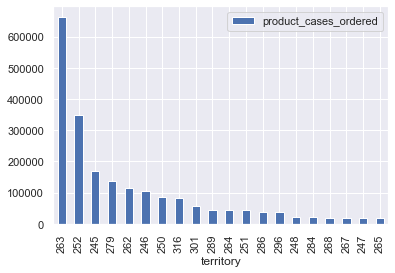

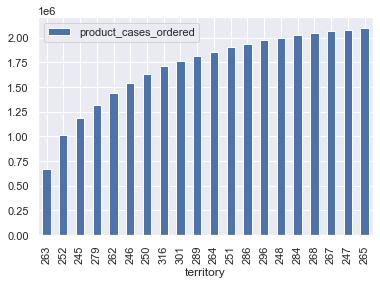

In [11]:
piv2 = df.pivot_table(index = 'territory', aggfunc=sum)
piv2.sort_values(by='product_cases_ordered', inplace=True, ascending=False)
fig = piv2.plot.bar()
fig2 = piv2.cumsum().plot.bar()
piv2['product_cases_ordered'] = piv2['product_cases_ordered'].apply(lambda x: "{:.1f}k".format((x/1000)))
piv2

### (5) Are there any notable patterns or trends in the productAgrupationID with high sales volume?

,product_cases_ordered
productAgrupationID,
1121,85.9k
1104,60.8k
1123,54.0k
1103,52.4k
1202,50.9k
...,...
1061,0.0k
1281,0.0k
1603,0.0k


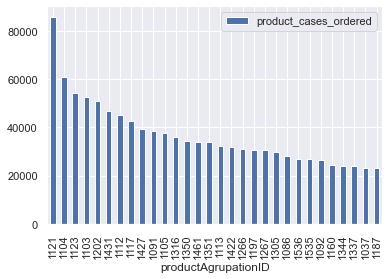

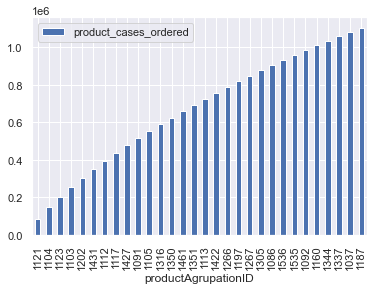

In [12]:

piv3 = df.pivot_table(index = 'productAgrupationID', aggfunc=sum)
piv3.sort_values(by='product_cases_ordered', inplace=True, ascending=False)
fig3 = piv3[0:30].plot.bar()
fig4 = piv3[0:30].cumsum().plot.bar()
piv3['product_cases_ordered'] = piv3['product_cases_ordered'].apply(lambda x: "{:.1f}k".format((x/1000)))
piv3